In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier #分类树
from sklearn.ensemble import RandomForestClassifier #随机森林在ensemble模块下，这里是分类器
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split #划分测试集与分类集
from sklearn.model_selection import cross_val_score #交叉验证
from sklearn import metrics
from sklearn.metrics import classification_report

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 导入数据，划分训练集测试集

In [3]:
dataset_file = "./stressSensorGait_dataset/normal_gait.csv"
gait = pd.read_csv(dataset_file)


x=gait.iloc[:,[0,1,2,3]]
y=gait.iloc[:,[4]]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [4]:
xtrain.values
xtest.values
ytrain=ytrain.values.ravel()
ytest=ytest.values.ravel()

In [5]:
#定义分类器
classifier1 = RandomForestClassifier()
classifier2 = DecisionTreeClassifier()

In [6]:
#随机森林参数
parameters1 = {'n_estimators': [30,60,100,200], 
              'max_depth': [9,12,15,20], 
              'max_features' : ['auto', 'log2']
             }
#决策树参数
parameters2 = {'criterion':['gini'],
               'class_weight':['balanced'],
                'max_depth':[10,20,30,40],
               'min_samples_leaf':[1,2,3,5,10],
              }

In [7]:
#随机森林模型训练
clf = GridSearchCV(classifier1, parameters1, cv=10)#10倍交叉验证
clf.fit(xtrain, ytrain)
print("最优的模型参数:",clf.best_params_)

最优的模型参数: {'max_depth': 20, 'max_features': 'auto', 'n_estimators': 200}


In [8]:
#随机森林在测试集准确率
ypred_test=clf.predict(xtest)
accuracy_test=accuracy_score(ytest,ypred_test)
print('随机森林测试集准确率：',accuracy_test)

#随机森林在训练集准确率
ypred_train=clf.predict(xtrain)
accuracy_train=accuracy_score(ytrain,ypred_train)
print('随机森林训练集准确率：',accuracy_train)

随机森林测试集准确率： 0.9505358615004122
随机森林训练集准确率： 1.0


In [9]:
#决策树模型训练
rfc = GridSearchCV(classifier2, parameters2, cv=10)
rfc.fit(xtrain, ytrain)
print("最优的模型参数:",rfc.best_params_)

最优的模型参数: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1}


In [10]:
ypred_train2=rfc.predict(xtrain)
accuracy_train2=accuracy_score(ytrain,ypred_train2)
print('决策树训练集准确率：',accuracy_train2)

ypred_test2=rfc.predict(xtest)
accuracy_test2=accuracy_score(ytest,ypred_test2)
print('决策树训练集准确率：',accuracy_test2)

决策树训练集准确率： 1.0
决策树训练集准确率： 0.9192085737840066


In [11]:
labels = ["walk","run","jump","Upstairs", "Downstairs"]

y_true=ytest
matrix1 = metrics.confusion_matrix(ypred_test, y_true)
matrix2 = metrics.confusion_matrix(ypred_test2, y_true)

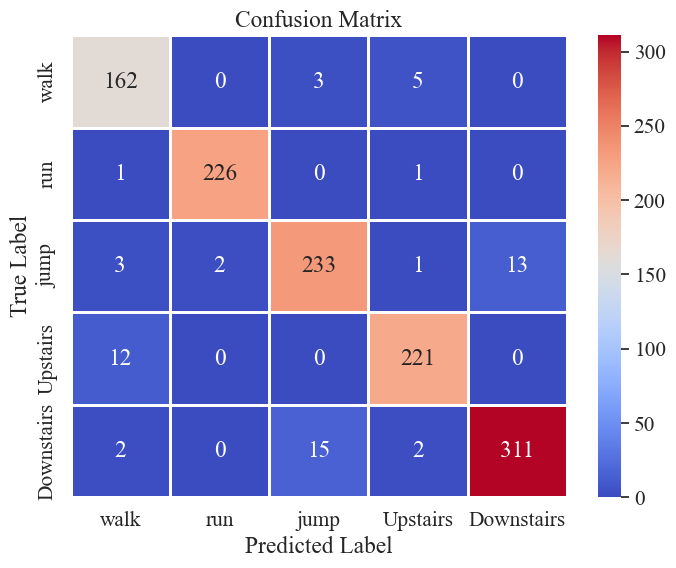

In [14]:
plt.figure(figsize=(8, 6))
sns.set_theme(style="whitegrid",font='Times New Roman',font_scale=1.4)
sns.heatmap(matrix1,
            
            cmap="coolwarm",
            linecolor='white',
            linewidths=1,
            xticklabels=labels,
            yticklabels=labels,
            annot=True,
            fmt="d")
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")

imagePath1 = './image/rfNormalGaitConfusionMatrix.jpg'
plt.savefig(imagePath1, dpi=500, bbox_inches = 'tight')
plt.show()


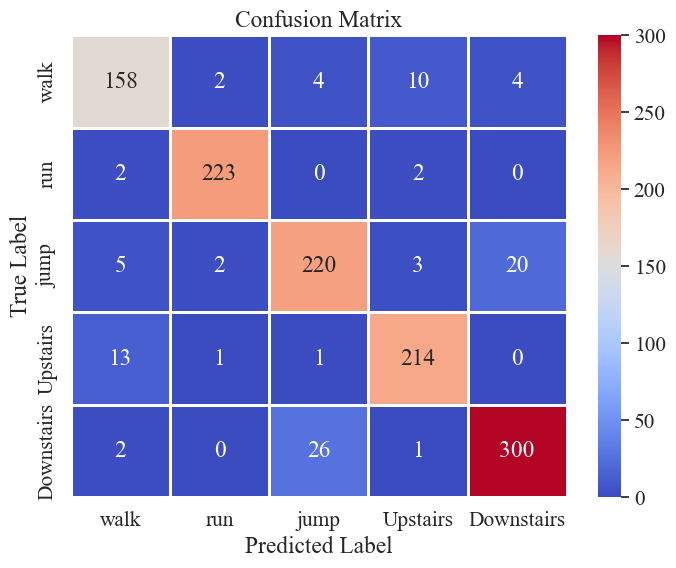

In [15]:
plt.figure(figsize=(8, 6))
sns.set_theme(style="whitegrid",font='Times New Roman',font_scale=1.4)
sns.heatmap(matrix2,
            
            cmap="coolwarm",
            linecolor='white',
            linewidths=1,
            xticklabels=labels,
            yticklabels=labels,
            annot=True,
            fmt="d")

plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")

imagePath2 = './image/dtNormalGaitConfusionMatrix.jpg'
plt.savefig(imagePath2, dpi=500, bbox_inches = 'tight')
plt.show()